# House Rocket Project

## 1) Bibliotecas


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.simplefilter(action="ignore", category=FutureWarning)

## 2 ) Dados

### 2.1) Importação dos dados

In [2]:
data = pd.read_csv('kc_house_data.csv')

### 2.2) Dimensões e tipos das variáveis

In [3]:
#data dimensions
print('Number of rows: {}'.format(data.shape[0]))
print('Number of columns: {}'.format(data.shape[1]))

data.dtypes

Number of rows: 21613
Number of columns: 21


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 2.3 ) Transformando dados

In [4]:
#transformar formato da data
data['date'] = pd.to_datetime(data['date'])
#transformando formato da coluna 'waterfront'
data['waterfront'] = data['waterfront'].astype(str)

### 2.4) Limpeza de dados

In [5]:
# ID's
print(len(data['id'].unique().tolist()))

data.sort_values('id').head(10)

21436


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,2015-04-22,300000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
2496,1000102,2014-09-16,280000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
6735,1200019,2014-05-08,647500.00,4,1.75,2060,26036,1.00,0,0,...,8,1160,900,1947,0,98166,47.44,-122.35,2590,21891
8411,1200021,2014-08-11,400000.00,3,1.00,1460,43000,1.00,0,0,...,7,1460,0,1952,0,98166,47.44,-122.35,2250,20023
8809,2800031,2015-04-01,235000.00,3,1.00,1430,7599,1.50,0,0,...,6,1010,420,1930,0,98168,47.48,-122.27,1290,10320
3557,3600057,2015-03-19,402500.00,4,2.00,1650,3504,1.00,0,0,...,7,760,890,1951,2013,98144,47.58,-122.29,1480,3504
18521,3600072,2015-03-30,680000.00,4,2.75,2220,5310,1.00,0,0,...,7,1170,1050,1951,0,98144,47.58,-122.29,1540,4200
3200,3800008,2015-02-24,178000.00,5,1.50,1990,18200,1.00,0,0,...,7,1990,0,1960,0,98178,47.49,-122.26,1860,8658
21063,5200087,2014-07-09,487000.00,4,2.50,2540,5001,2.00,0,0,...,9,2540,0,2005,0,98108,47.54,-122.30,2360,6834
4333,6200017,2014-11-12,281000.00,3,1.00,1340,21336,1.50,0,0,...,5,1340,0,1945,0,98032,47.40,-122.27,1340,37703


In [6]:
# Deletando os ID's repetidos, deixando o último cadastrado

data = data.drop_duplicates(subset = ['id'], keep = 'last')

data.sort_values('id').head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2497,1000102,2015-04-22,300000.00,6,3.00,2400,9373,2.00,0,0,...,7,2400,0,1991,0,98002,47.33,-122.21,2060,7316
6735,1200019,2014-05-08,647500.00,4,1.75,2060,26036,1.00,0,0,...,8,1160,900,1947,0,98166,47.44,-122.35,2590,21891
8411,1200021,2014-08-11,400000.00,3,1.00,1460,43000,1.00,0,0,...,7,1460,0,1952,0,98166,47.44,-122.35,2250,20023
8809,2800031,2015-04-01,235000.00,3,1.00,1430,7599,1.50,0,0,...,6,1010,420,1930,0,98168,47.48,-122.27,1290,10320
3557,3600057,2015-03-19,402500.00,4,2.00,1650,3504,1.00,0,0,...,7,760,890,1951,2013,98144,47.58,-122.29,1480,3504


In [7]:
# Verificando Outliers nos atributos

unique = data[['bedrooms','bathrooms','floors','waterfront','view','condition','grade']]

for i in unique:
    print('Atributo: {} - {}'.format(i, data[i].unique().tolist()))     

Atributo: bedrooms - [3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]
Atributo: bathrooms - [1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.75, 3.25, 4.0, 3.5, 0.75, 4.75, 5.0, 4.25, 3.75, 0.0, 1.25, 5.25, 6.0, 0.5, 5.5, 6.75, 5.75, 8.0, 7.5, 7.75, 6.25, 6.5]
Atributo: floors - [1.0, 2.0, 1.5, 3.0, 2.5, 3.5]
Atributo: waterfront - ['0', '1']
Atributo: view - [0, 3, 4, 2, 1]
Atributo: condition - [3, 5, 4, 1, 2]
Atributo: grade - [7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13, 1]


In [8]:
#Removendo imóvel com suposto erro de digitação no atributo 'bedrooms'
data.drop(data.loc[data['bedrooms'] == 33].index, inplace=True)

## 3) Exploração dos dados

### 3.1) Estatística Descritiva

In [9]:
num_attibutes = data.select_dtypes( include= ['int64','float64'])
num_attibutes = num_attibutes.iloc[:, 1: ]
num_attibutes = num_attibutes.drop(columns=['zipcode', 'lat','long'])

# central tendency : mean and median
mean = pd.DataFrame(num_attibutes.apply(np.mean, axis=0))
median = pd.DataFrame(num_attibutes.apply(np.median, axis=0))

# dispersion tendency: std, min and max
std = pd.DataFrame(num_attibutes.apply(np.std, axis=0))
min_ = pd.DataFrame(num_attibutes.apply(np.min, axis=0))
max_ = pd.DataFrame(num_attibutes.apply(np.max, axis=0))

att = pd.concat((max_, min_, mean, median,std), axis=1).reset_index()
att.columns = ('attributes','maximum','minimum','mean', 'median','std')
att

,attributes,maximum,minimum,mean,median,std
0,price,7700000.00,75000.00,541645.37,450000.00,367314.32
1,bedrooms,11.00,0.00,3.37,3.00,0.91
2,bathrooms,8.00,0.00,2.12,2.25,0.77
3,sqft_living,13540.00,290.00,2082.73,1920.00,919.14
4,sqft_lot,1651359.00,520.00,15136.06,7614.00,41538.57
5,floors,3.50,1.00,1.50,1.50,0.54
6,view,4.00,0.00,0.24,0.00,0.77
7,condition,5.00,1.00,3.41,3.00,0.65
8,grade,13.00,1.00,7.66,7.00,1.17
9,sqft_above,9410.00,290.00,1791.00,1560.00,829.01


### 3.2) Novas Features

In [10]:
df = data.copy()

# Ano de construção: >< 1955

df['constrution'] = df['yr_built'].apply(lambda x: '> 1955' if x > 1955
        else '< 1955')

#Imoveis com porão ou sem porão
      
df['basement'] = df['sqft_basement'].apply(lambda x: 'no' if x == 0
        else 'yes')        

# Season

df['mouth'] = pd.to_datetime(df['date']).dt.month
df['season'] = df['mouth'].apply(lambda x: 'summer' if (x > 5) & (x < 8) else
                                           'spring' if (x > 2) & (x < 5) else
                                           'fall' if (x > 8) & (x < 12) else
                                           'winter')

# Waterfront

df['waterfront_'] = df['waterfront'].apply(lambda x: 'sim' if x == '1'
        else 'não')

# Reforma

df['renovated'] = df['yr_renovated'].apply(lambda x: 'no' if x == 0
        else 'yes')

# criar um 'describe' para condição, para acrescentar no relatório

df['describe_condition'] = df['condition'].apply(lambda x: 'too bad' if x == 1 else
                                                         'bad' if x == 2 else
                                                         'median'if x == 3 else
                                                         'good' if x == 4 else
                                                         'excellent')

### 3.3) Insights 

H1: Imóveis que possuem vista para água, são mais caros, na média.

H2: Imóveis com data de construção menor que 1955, são mais baratos, na média. 

H3: Imóveis sem porão possuem "sqrt_lot" maiores do que com porão.

H4: Houve crescimento do preço dos imóveis YoY ( Year over Year ). 

H5: Imóveis com mais quartos são em média mais caros.

H1 é verdadeira, pois os imóveis com vista pra agua são em média 212% mais caros


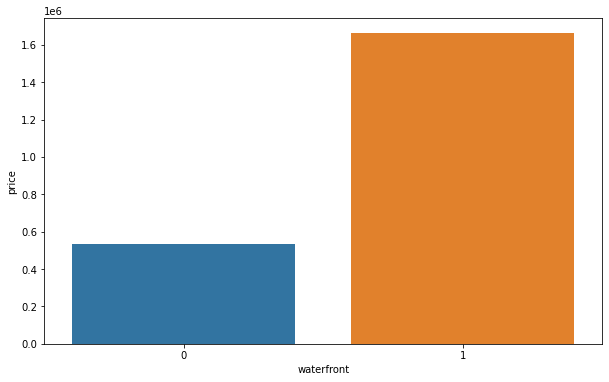

In [11]:
#H1 
h1 = df[['price','waterfront']].groupby('waterfront').mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(h1['waterfront'],h1['price'])

h1_percent = (h1.loc[1,'price'] - h1.loc[0,'price']) / h1.loc[0,'price']
print('H1 é verdadeira, pois os imóveis com vista pra agua são em média {0:.0%} mais caros'.format(h1_percent))

H2 é falsa, pois os imóveis construídos antes de 1955, são em média apenas 1% mais baratos


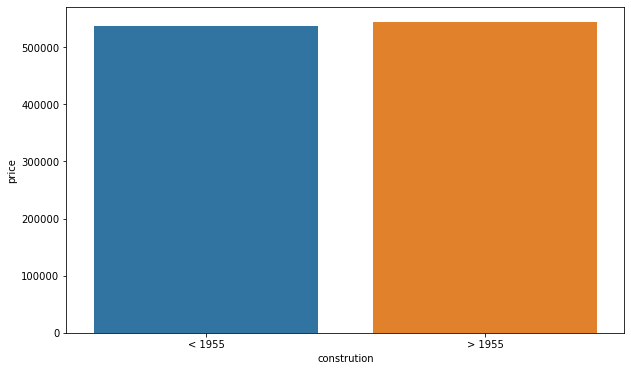

In [12]:
#H2
h2 = df[['price','constrution']].groupby('constrution').mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(h2['constrution'],h2['price'])

h2_percent = (h2.loc[1,'price'] - h2.loc[0,'price']) / h2.loc[1,'price']
print('H2 é falsa, pois os imóveis construídos antes de 1955, são em média apenas {0:.0%} mais baratos'.format(h2_percent))

H3 é verdadeira, pois os imóveis sem porão, possuem área do lote 23% maior


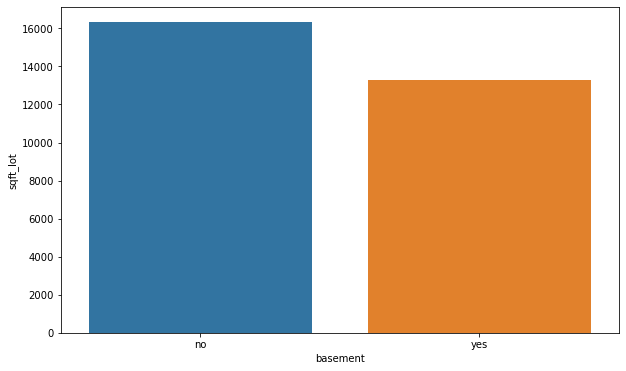

In [13]:
#H3
h3 = df[['sqft_lot','basement']].groupby('basement').mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(h3['basement'],h3['sqft_lot'])

h3_percent = (h3.loc[0,'sqft_lot'] - h3.loc[1,'sqft_lot']) / h3.loc[1,'sqft_lot']
print('H3 é verdadeira, pois os imóveis sem porão, possuem área do lote {0:.0%} maior'.format(h3_percent))


H4 é falsa, pois o crescimento do preço entre os anos foi de 0%


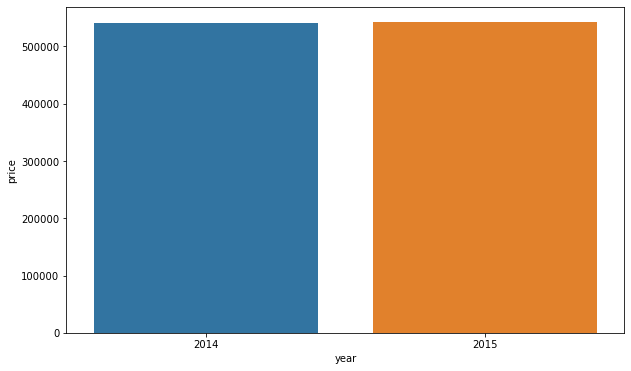

In [14]:
# H4

df['year'] = pd.to_datetime(df['date']).dt.year
h4 = df[['price','year']].groupby('year').mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(h4['year'],h4['price'])

h4_percent = (h4.loc[1,'price'] - h4.loc[0,'price']) / h4.loc[0,'price']
print('H4 é falsa, pois o crescimento do preço entre os anos foi de {0:.0%}'.format(h4_percent))


H5 é verdadeira, pois os imóveis com mais quartos(acima de 5), são 69% mais caros


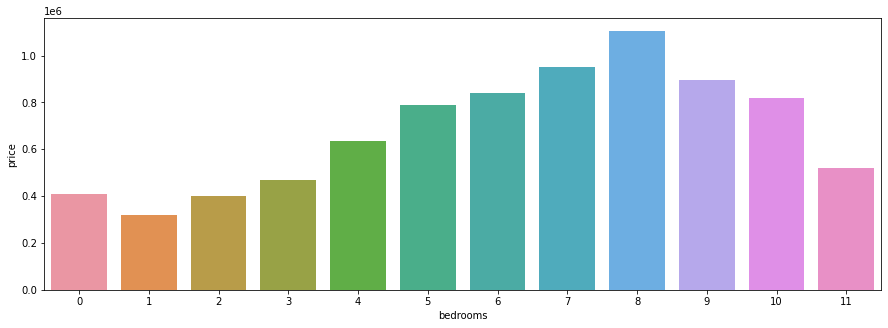

In [15]:
#H5

h5 = df[['price','bedrooms']].groupby('bedrooms').mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(h5['bedrooms'],h5['price'])

median = h5['bedrooms'].median()

bed_above = h5['price'][h5['bedrooms'] > median].mean()
bed_below = h5['price'][h5['bedrooms'] < median].mean()
h5_percent = (bed_above - bed_below) / bed_below

print('H5 é verdadeira, pois os imóveis com mais quartos(acima de 5), são {0:.0%} mais caros'.format(h5_percent))


## 4) Questões do negócio

### 4.1) Quais são os imóveis que a House Rocket deveria comprar e por qual preço ?

In [16]:
# Agrupar os imóveis por região ( coluna zipcode ).
# Dentro de cada região, encontrar a mediana do preço do imóvel.

df1 = data[['zipcode','price']].groupby('zipcode').median().reset_index()
df1 = df1.rename(columns={'price': 'price_median'})

# unir o df2 com o dataset original, alocando cada preço mediano em cada linha, através do zipcode

df = pd.merge(df1,df,on='zipcode',how='inner')

# pra cada imóvel, colocar na coluna "status" os indicadores "buy" ou "no buy" de dependendo das condições:

# a) o preço for menor que a mediana da região;
# b) o imóvel estiver em boas condições

for i in range(len(df)):
    
    if (df.loc[i,'price'] < df.loc[i,'price_median']) & (df.loc[i,'condition'] >= 3):
        df.loc[i,'status'] = 'buy'
    
    else:
        df.loc[i,'status'] = 'no buy'

In [17]:
# criar relatório com apenas as colunas de interesse, ordenando do menor preço para o maior, considerando as melhores condições de imóveis 
buy_houses = df[df['status'] == 'buy'].sort_values(by=['describe_condition','price'])
buy_houses[['id','zipcode','price','price_median','condition']].head()

print('Foram encontrados {} imóveis dentro das condições acima, sugeridos para compra'.format(len(buy_houses)))

Foram encontrados 10505 imóveis dentro das condições acima, sugeridos para compra


### 4.2) Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço ?

In [18]:
# Agrupar os imóveis por região ( coluna zipcode ) e por sazonalidade(season)
# Dentro de cada região/season encontrar a mediana do preço do imóvel.

df2 = df[['zipcode','season','price']].groupby(['zipcode','season']).median().reset_index()
df2 = df2.rename(columns={'price': 'price_median_season'})


# unir df2 com df
df3 = pd.merge(buy_houses,df2,how ='inner', on=['zipcode','season'])


In [19]:
# Condições de venda:
# 1. Se o preço da compra for maior que a mediana da região + sazonalidade.
# O preço da venda será igual ao preço da compra + 10%
# 2. Se o preço da compra for menor que a mediana da região + sazonalidade.
# O preço da venda será igual ao preço da compra + 30%
        
for i in range(len(df3)):
            if df3.loc[i, 'price'] <= df3.loc[i, 'price_median_season']:
                 df3.loc[i, 'sale_price'] = df3.loc[i, 'price'] * 1.30
            elif df3.loc[i, 'price'] > df3.loc[i, 'price_median_season']:
                 df3.loc[i, 'sale_price'] = df3.loc[i, 'price'] * 1.10
            else:
                 pass
                
df3['profit'] = df3['sale_price'] - df3['price']

In [20]:
# relatório final: Sugestões de compra, com possíveis indicadores de preço de venda e lucro
df3[['id','zipcode','price','price_median','season','price_median_season','describe_condition','sale_price','profit']].head()

,id,zipcode,price,price_median,season,price_median_season,describe_condition,sale_price,profit
0,5111400086,98038,110000.00,342500.00,winter,342000.00,excellent,143000.00,33000.00
1,1545801970,98038,250000.00,342500.00,winter,342000.00,excellent,325000.00,75000.00
2,1545806720,98038,254950.00,342500.00,winter,342000.00,excellent,331435.00,76485.00
3,1545803340,98038,269000.00,342500.00,winter,342000.00,excellent,349700.00,80700.00
4,1545807990,98038,315000.00,342500.00,winter,342000.00,excellent,409500.00,94500.00


In [21]:
# Total do lucro considerando quadro de sugestão
df3['profit'].sum()

1186638788.2

In [22]:
# Custo total
df3['price'].sum()

4079586744.0

In [23]:
# Receita total
df3['sale_price'].sum()

5266225532.2

### 4.3) Insights - Imóveis selecionados

In [24]:
# Seleção dos atributos cujo array é analisável
df4 = df3[['zipcode','bedrooms','bathrooms','floors','season',
           'renovated','describe_condition','waterfront_','basement','grade','view','constrution']]

Insights - Imóveis selecionados
Imóveis mais lucrativos são os com "zipcode" igual a "98052"
Imóveis mais lucrativos são os com "bedrooms" igual a "3"
Imóveis mais lucrativos são os com "bathrooms" igual a "1.0"
Imóveis mais lucrativos são os com "floors" igual a "1.0"
Imóveis mais lucrativos são os com "season" igual a "winter"
Imóveis mais lucrativos são os com "renovated" igual a "no"
Imóveis mais lucrativos são os com "describe_condition" igual a "median"
Imóveis mais lucrativos são os com "waterfront_" igual a "não"
Imóveis mais lucrativos são os com "basement" igual a "no"
Imóveis mais lucrativos são os com "grade" igual a "7"
Imóveis mais lucrativos são os com "view" igual a "0"
Imóveis mais lucrativos são os com "constrution" igual a "> 1955"


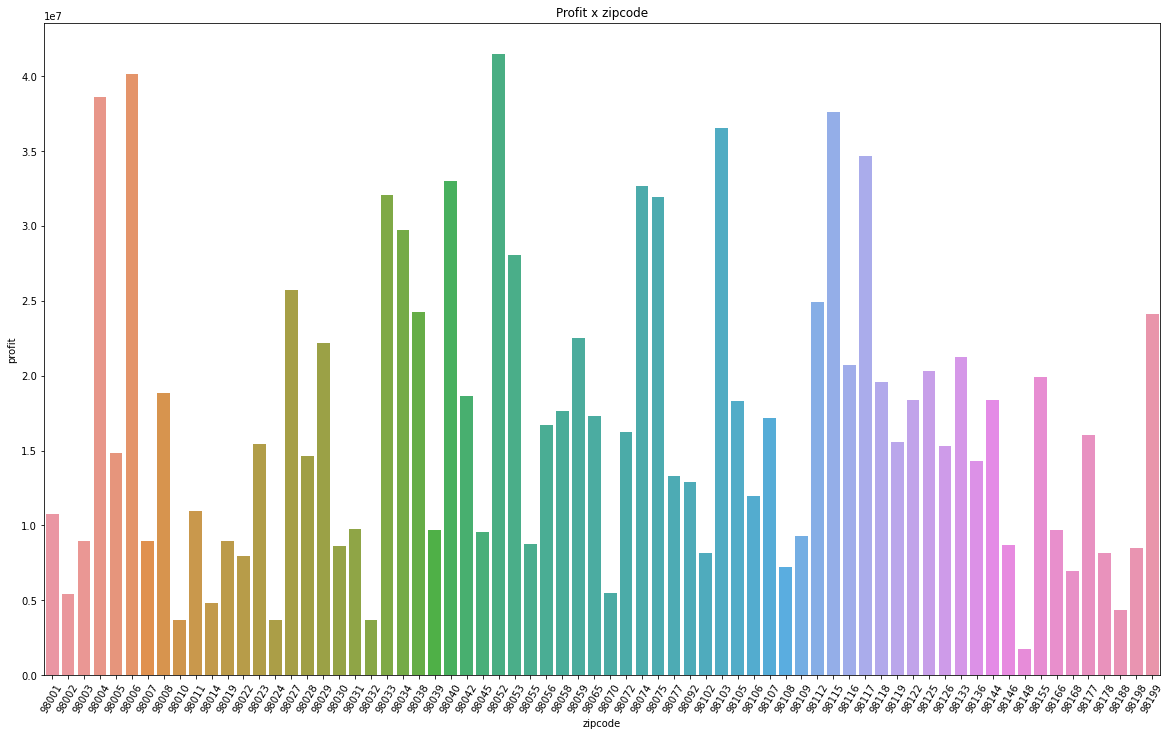

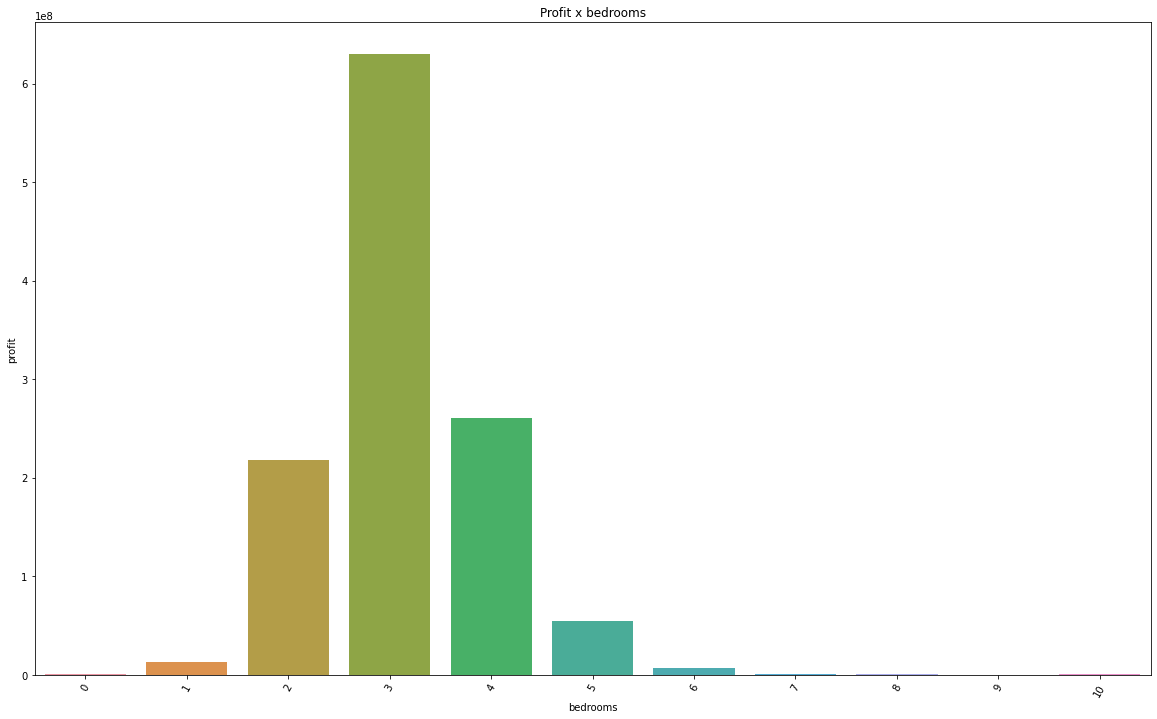

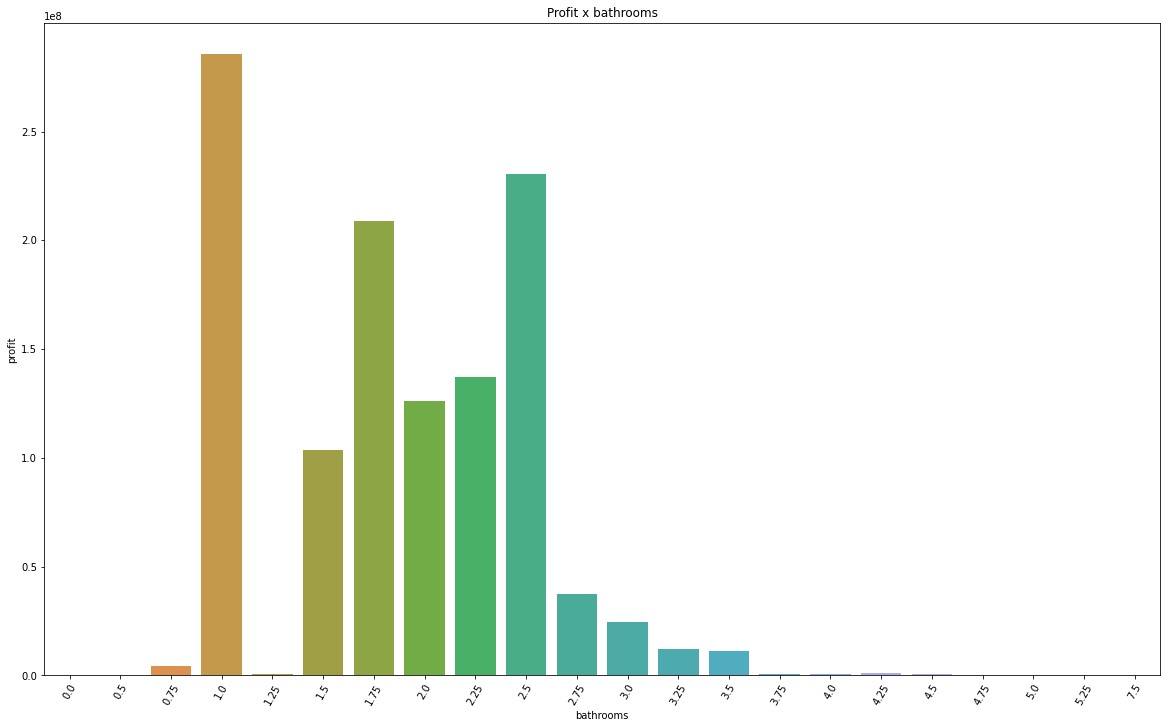

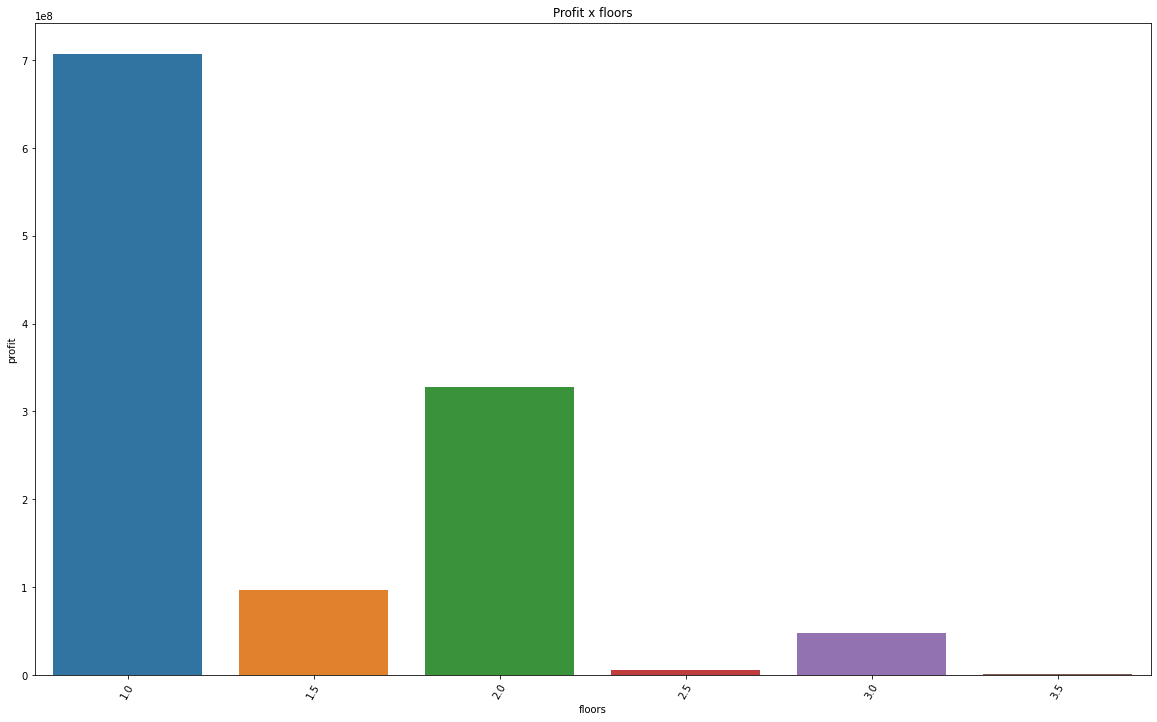

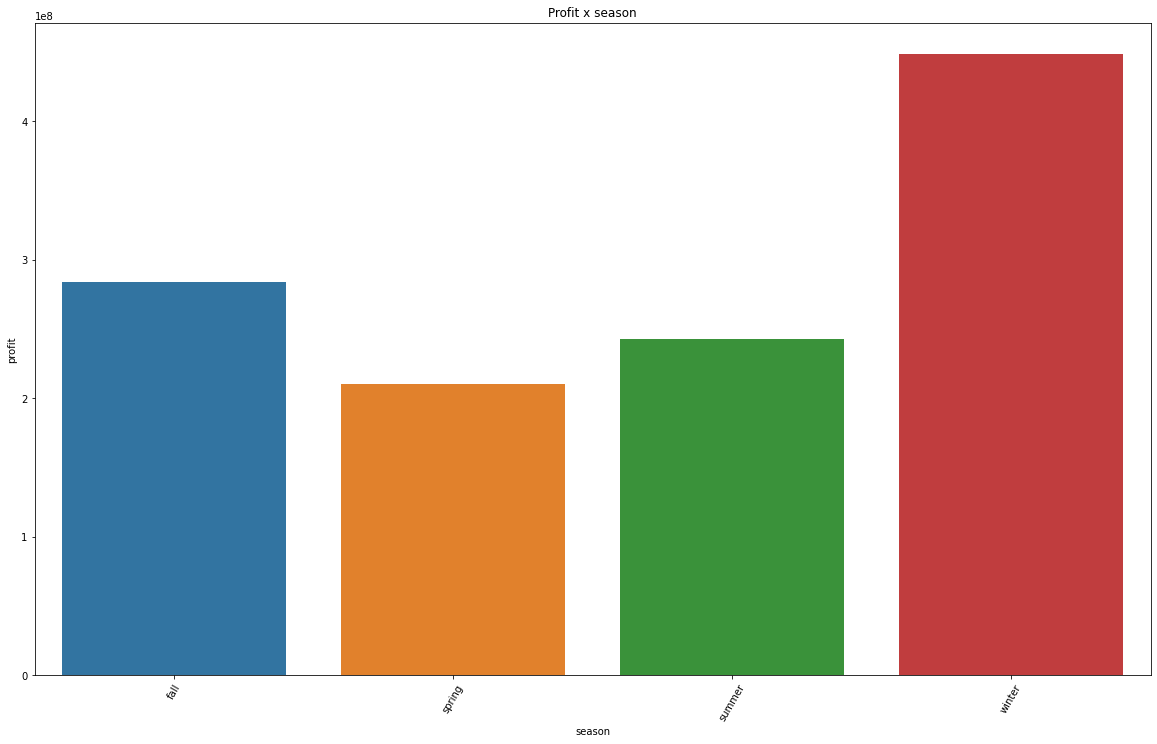

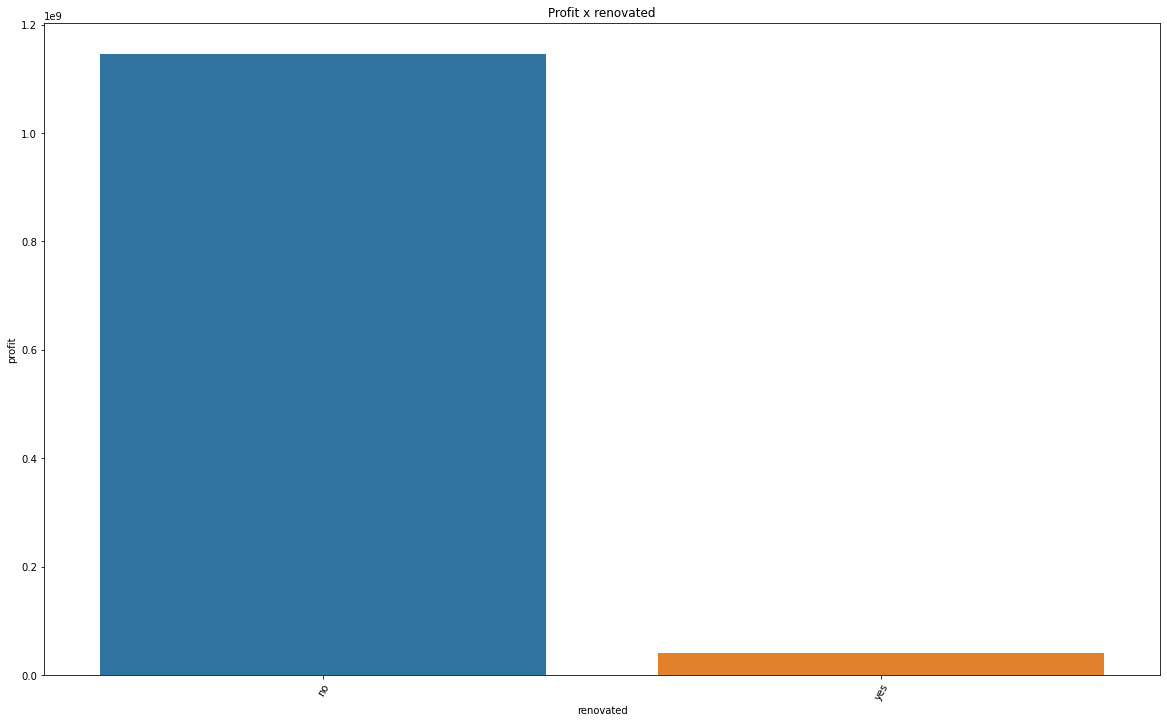

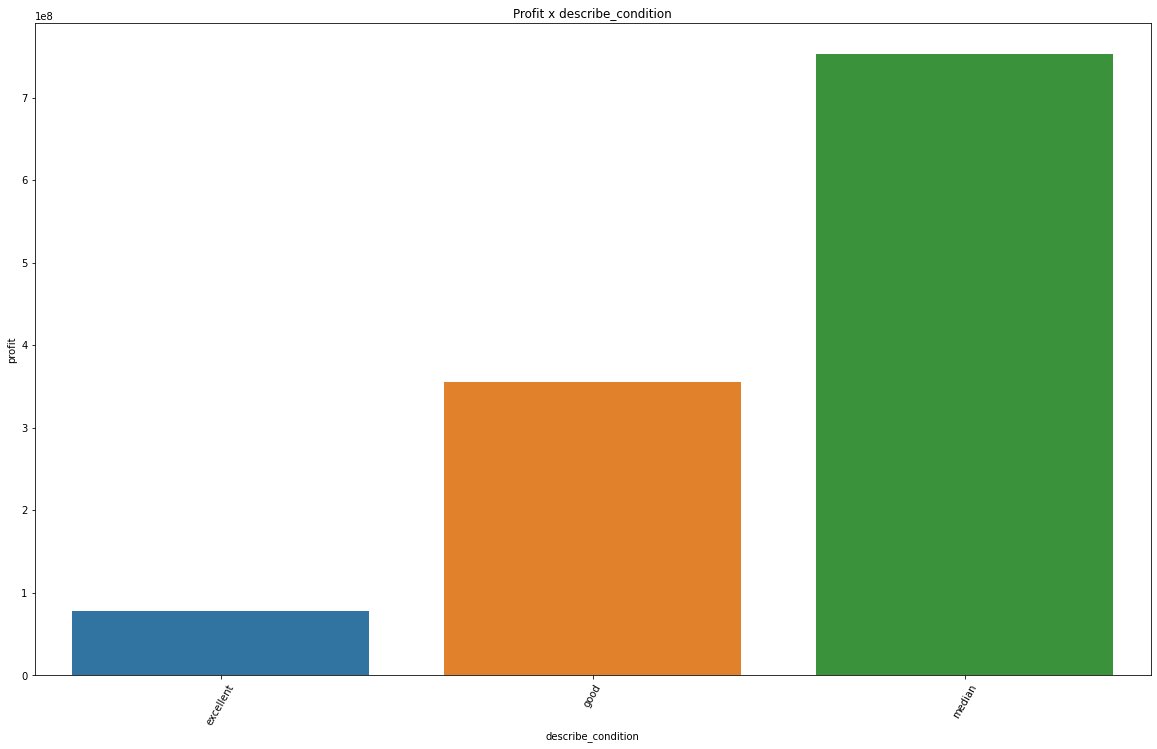

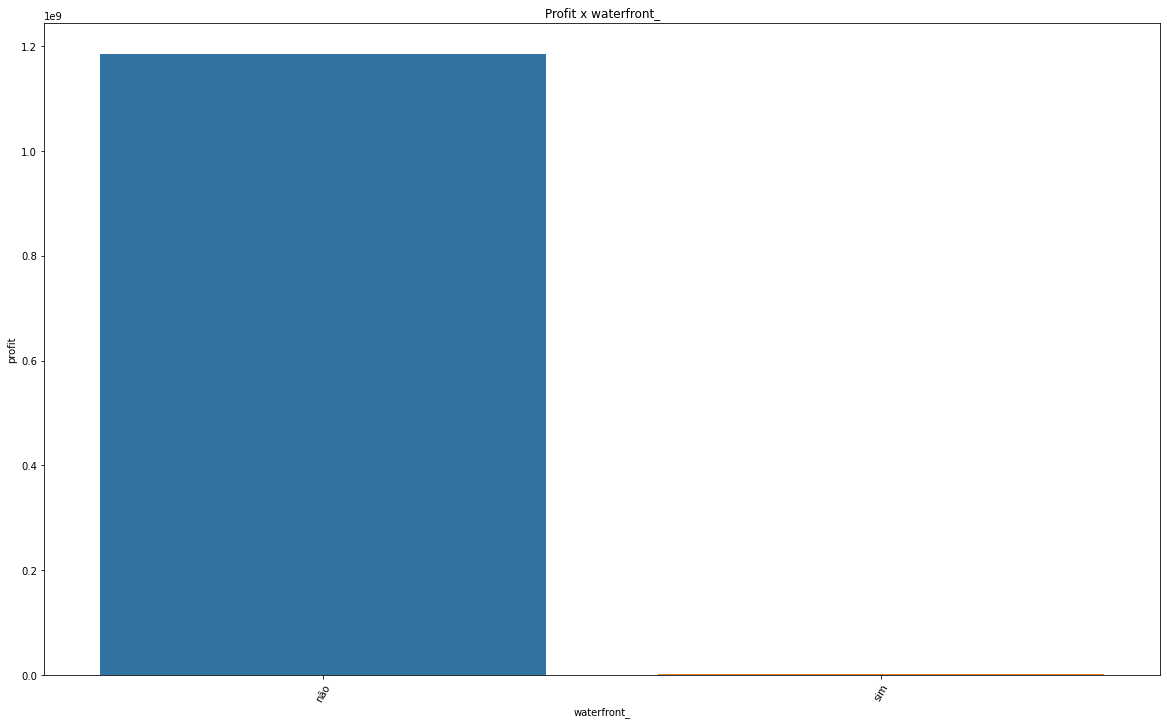

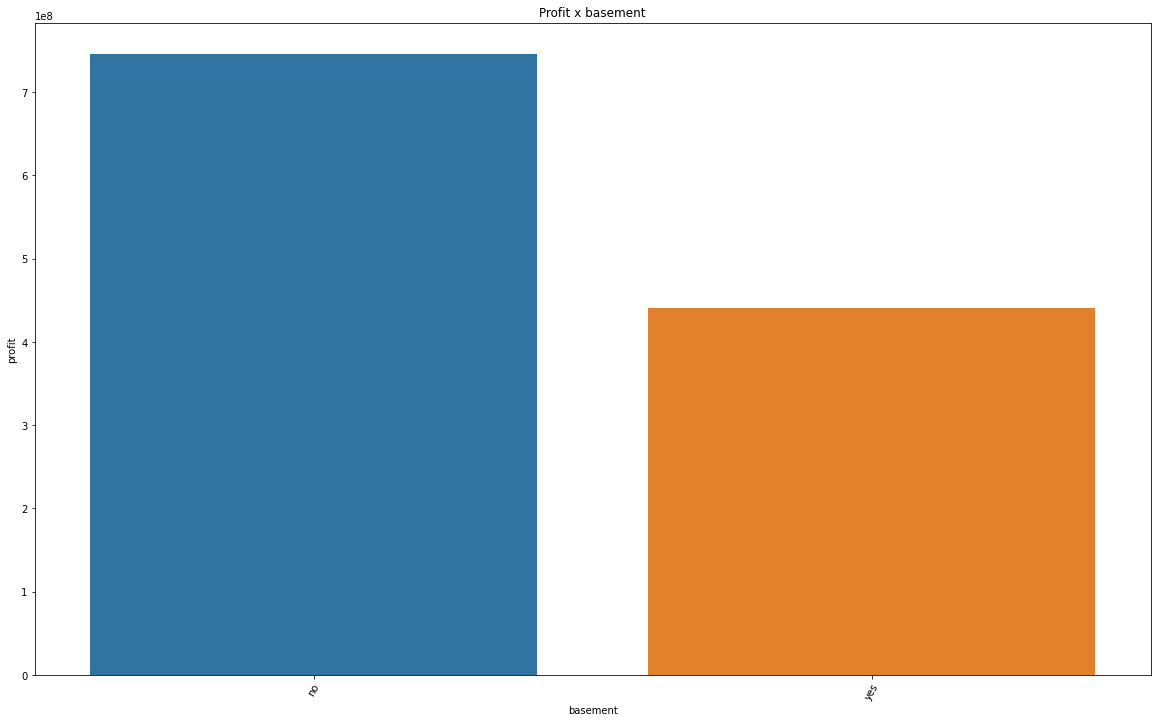

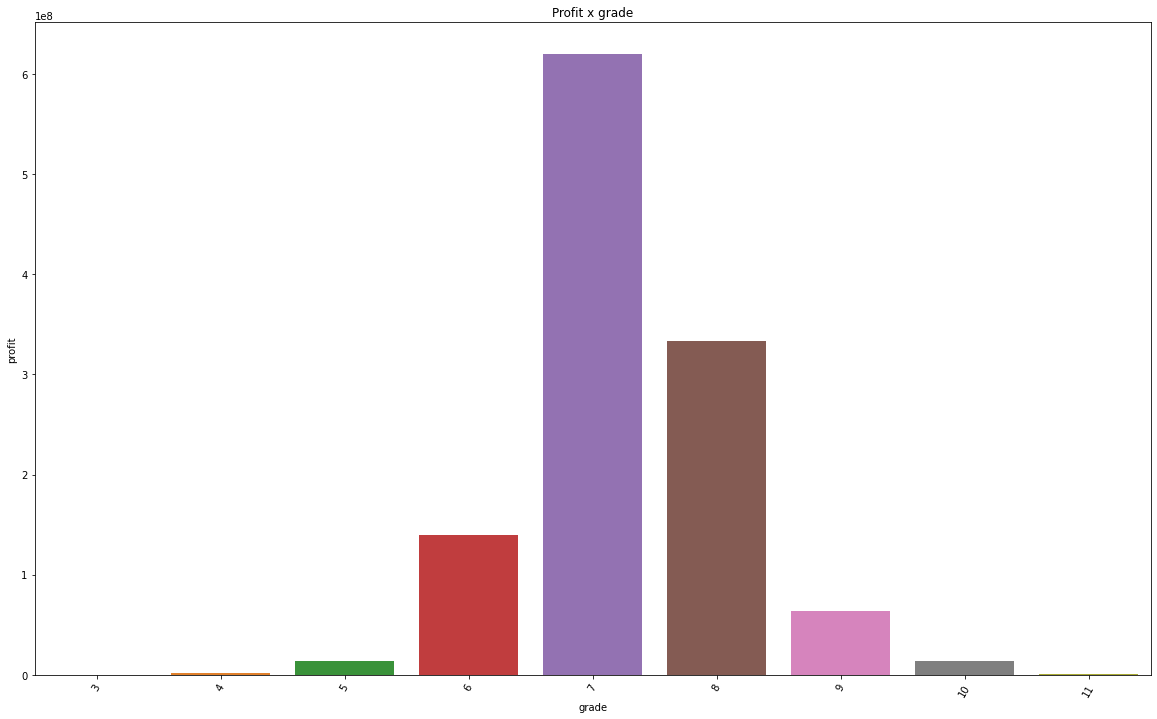

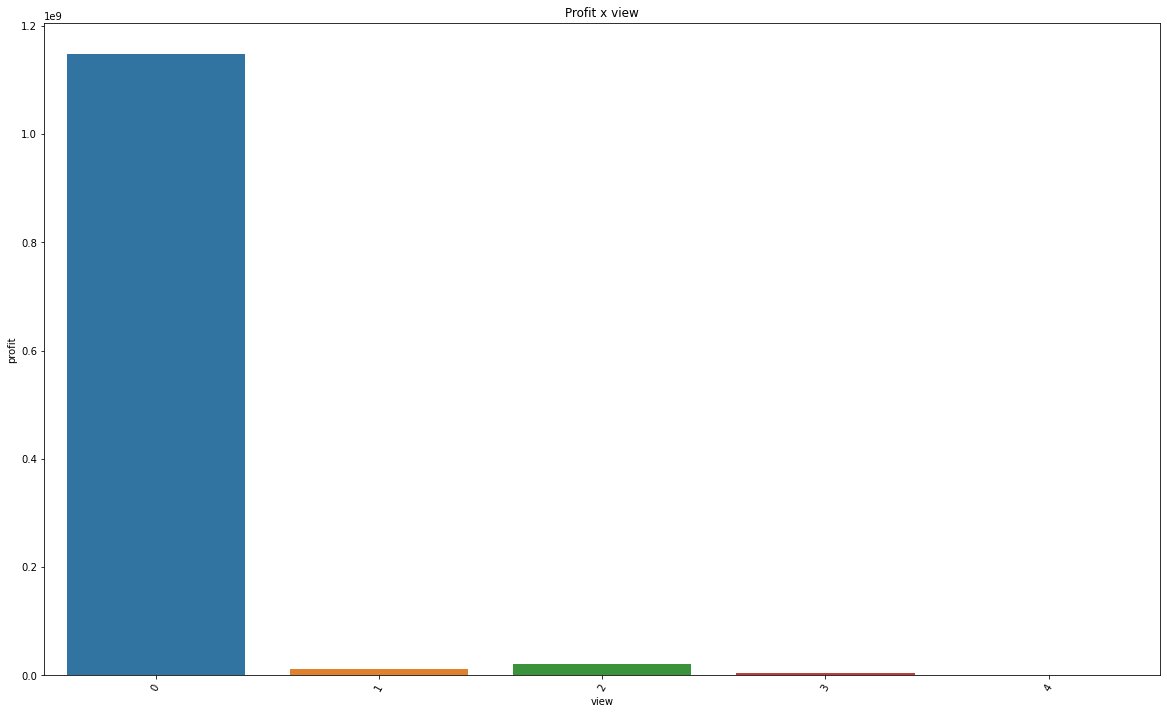

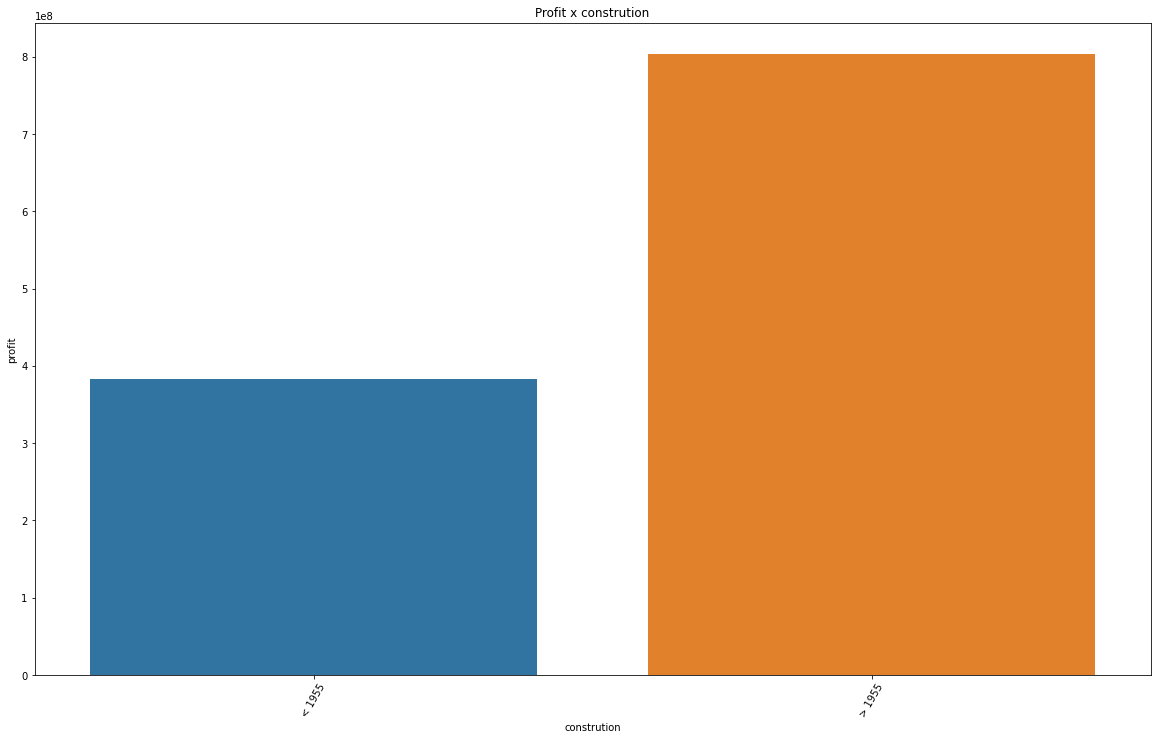

In [25]:
print("Insights - Imóveis selecionados")
conditions = []
for i in df4.columns:
            ins = df3[['profit',i]].groupby(i).sum().reset_index()
            plt.figure(figsize=(20,12))
            sns.barplot(ins[i],ins['profit']).set(title='Profit x {}'.format(i))
            plt.xticks(rotation=60);
            ins2 = ins[ins['profit'] == ins['profit'].max()]
            conditions.append(ins2.iloc[0,0])
            print('Imóveis mais lucrativos são os com "{}" igual a "{}"'.format(i, ins2.iloc[0,0]))


In [26]:
dx = pd.DataFrame(columns=['atributo','condicao','total_imoveis','%_imoveis','lucro_total','%_lucro'])

dx['atributo'] = ['zipcode','bedrooms','bathrooms','floors','season',
           'renovated','describe_condition','waterfront_','basement','grade','view','constrution']

dx['condicao'] = conditions

for i in range(len(dx)):
    dx.loc[i,'total_imoveis'] = df3['id'][df3[dx.loc[i,'atributo']] == dx.loc[i,'condicao']].count()
    dx.loc[i,'%_imoveis'] = float(dx.loc[i,'total_imoveis'] / df3['id'].count() * 100)
    dx.loc[i,'lucro_total'] = df3['profit'][df3[dx.loc[i,'atributo']] == dx.loc[i,'condicao']].sum()
    dx.loc[i,'%_lucro'] = float(dx.loc[i,'lucro_total'] / df3['profit'].sum() * 100)

dx

,atributo,condicao,total_imoveis,%_imoveis,lucro_total,%_lucro
0,zipcode,98052,281,2.67,41495434.30,3.50
1,bedrooms,3,5752,54.75,630600012.90,53.14
2,bathrooms,1.00,3041,28.95,285610036.70,24.07
3,floors,1.00,6595,62.78,707307614.60,59.61
4,season,winter,3978,37.87,448773828.40,37.82
5,renovated,no,10193,97.03,1146786122.90,96.64
6,describe_condition,median,6717,63.94,752834621.20,63.44
7,waterfront_,não,10496,99.91,1185834859.00,99.93
8,basement,no,7003,66.66,746397036.20,62.90
9,grade,7,5821,55.41,620481755.30,52.29


#### 4.3.1) Teste de Pareto

In [27]:
cond = [df3[df3['zipcode']== 98052],
         df3[df3['bedrooms']== 3],
        df3[df3['bathrooms']== 1.0],
        df3[df3['floors']== 1.0],
        df3[df3['season']== 'winter'],
        df3[df3['renovated']== 'no'],
        df3[df3['describe_condition'] == 'median'],
        df3[df3['waterfront_']== 'não'],
        df3[df3['basement']== 'no'],
        df3[df3['grade']== 7],
        df3[df3['view']== 0],
        df3[df3['constrution']== '> 1955']]


In [28]:
for i in cond:
    pareto = i
    par = pareto['profit'].sum() / df3['profit'].sum()
    count = pareto['id'].count() / df3['id'].count()
    print('O número de imóveis na condição é de {} % do total de imóveis'.format(count * 100))
    print('O percentual do lucro corresponde a {} %\n'.format(par * 100))


O número de imóveis na condição é de 2.674916706330319 % do total de imóveis
O percentual do lucro corresponde a 3.4968884139497907 %

O número de imóveis na condição é de 54.75487862922418 % do total de imóveis
O percentual do lucro corresponde a 53.141698987992 %

O número de imóveis na condição é de 28.948119942884343 % do total de imóveis
O percentual do lucro corresponde a 24.068826970778435 %

O número de imóveis na condição é de 62.77962874821513 % do total de imóveis
O percentual do lucro corresponde a 59.60597459256388 %

O número de imóveis na condição é de 37.86768205616373 % do total de imóveis
O percentual do lucro corresponde a 37.818907730189764 %

O número de imóveis na condição é de 97.0299857210852 % do total de imóveis
O percentual do lucro corresponde a 96.64155042829402 %

O número de imóveis na condição é de 63.9409804854831 % do total de imóveis
O percentual do lucro corresponde a 63.44261022698971 %

O número de imóveis na condição é de 99.91432651118515 % do to